#Моделирование сезонных и циклических колебаний Вариант 3

Общий вид мультипликативной модели выглядит так:  
$Y = T\bullet S\bullet E$

Процесс построения модели включает в себя следующие шаги:  
1. Выравнивание исходного ряда методом скользящей средней.
2. Расчет значений сезонной компоненты $S$.
3. Устранение сезонной компоненты из исходных уровней ряда и
получение выровненных данных ($T+E$) в аддитивной или ($T\bullet E$)
мультипликативной модели.
4. Аналитическое выравнивание уровней ($T+E$) или ($T\bullet E$) и расчет
значений T с использованием полученного уравнения тренда.
5. Расчет полученных по модели значений ($T+E$) или ($T\bullet E$).
6. Расчет абсолютных и/или относительных ошибок

## Импорт библиотек

In [67]:
import pandas as pd
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO
import numpy as np

## Загрузка данных

In [68]:
#data = StringIO('''№ квартала, t;Потребление электроэнергии, yt
#1; 6
#2; 4.4
#3; 5
#4; 9
#5; 7.2
#6; 4.8
#7; 6
#8; 10
#9; 8
#10; 5.6
#11; 6.4
#12; 11
#13; 9
#14; 6.6
#15; 7
#16; 10.8''')
#df = pd.read_csv(data, sep=";").set_index('№ квартала, t')
#df.plot(style='--o')

df = pd.read_csv('/content/data2.csv', delimiter = ';')
df['Товарооборот, % к предыдущему периоду'] = df['Товарооборот, % к предыдущему периоду'].str.replace(',', '.').astype(float)
df.set_index('Номер квартала', inplace=True)
df

,"Товарооборот, % к предыдущему периоду"
Номер квартала,
1,100.0
2,93.9
3,96.5
4,101.8
5,107.8
6,96.3
7,95.7
8,98.2
9,104.0


### 1. Проведем выравнивание исходных уравнений ряда методом скользящей средней

In [69]:
df['Скользящая средняя за 4 квартала'] = np.nan
for i in range(len(df) - 3):
    df[df.columns[1]].loc[i+3] = \
        df[df.columns[0]].loc[i+1:i+4].mean()

In [70]:
df['Центрированная cкользящая средняя'] = np.nan
for i in range(len(df) - 1):
    temp_data = df[df.columns[1]].loc[i+1:i+2] # текущее и предыдущее знач.
    if temp_data.isnull().any(): continue # если среди данных есть Nan
    df[df.columns[2]].loc[i+1] = temp_data.mean() # берем среднее по ним

In [71]:
df['Оценка сезонной компоненты'] = df[df.columns[0]] - df[df.columns[2]]
display(df)

,"Товарооборот, % к предыдущему периоду",Скользящая средняя за 4 квартала,Центрированная cкользящая средняя,Оценка сезонной компоненты
Номер квартала,,,,
1,100.0,NaN,NaN,NaN
2,93.9,NaN,NaN,NaN
3,96.5,98.050,99.0250,-2.5250
4,101.8,100.000,100.3000,1.5000
5,107.8,100.600,100.5000,7.3000
6,96.3,100.400,99.9500,-3.6500
7,95.7,99.500,99.0250,-3.3250
8,98.2,98.550,98.8875,-0.6875
9,104.0,99.225,99.6125,4.3875


Результирующая таблица шага 1.

### 2. Расчет значений сезонной компоненты в аддитивной модели


сгрупируем по годам оценку сезонной компоненты

In [72]:
df['Год'] = (df.index + 3) // 4
df[df.columns[3:5]].groupby('Год').sum()
dataFrame = df.groupby(['Год'])\
    .agg({'Оценка сезонной компоненты': lambda arg: list(arg)})\
    ['Оценка сезонной компоненты'].apply(pd.Series)\
    .rename(columns={i: f'{i + 1} квартал' for i in range(4)})
dataFrame

,1 квартал,2 квартал,3 квартал,4 квартал
Год,,,,
1,NaN,NaN,-2.5250,1.5000
2,7.3000,-3.6500,-3.3250,-0.6875
3,4.3875,-1.4625,-3.2625,-1.2250
4,10.2375,-4.3000,NaN,NaN


In [73]:
dataFrame.index = pd.MultiIndex.from_product([[''],[1,2,3,4]], names = ['Показатели', 'Год'])

In [74]:
dataFrame.loc[('Итого за i-тый квартал',''), :] = dataFrame.loc[''].sum()
dataFrame.loc[('Средняя оценка сезонной компоненты для i-го квартала',''), :] = \
    dataFrame.loc[''].mean()
dataFrame.loc[('Скорректированная сезонная компонента',''), :] = \
    dataFrame.loc[('Средняя оценка сезонной компоненты для i-го квартала','')] - \
    dataFrame.loc[('Средняя оценка сезонной компоненты для i-го квартала','')].mean()
dataFrame.loc[('Корректирующий коэффициет',
    dataFrame.loc[('Средняя оценка сезонной компоненты для i-го квартала','')].mean().round(3)
              ), :] = ''
dataFrame['Сумма'] = ''
for column in ['Средняя оценка сезонной компоненты для i-го квартала','Скорректированная сезонная компонента']:
    dataFrame.loc[(column,''), 'Сумма'] = \
        dataFrame.loc[(column,''),dataFrame.columns[0:-1]].sum()

In [75]:
round(dataFrame,3)

1 квартал 2 квартал  \
Показатели                                         Год                         
                                                   1           NaN       NaN   
                                                   2           7.3     -3.65   
                                                   3        4.3875   -1.4625   
                                                   4       10.2375      -4.3   
Итого за i-тый квартал                                      21.925   -9.4125   
Средняя оценка сезонной компоненты для i-го ква...        7.308333   -3.1375   
Скорректированная сезонная компонента                     7.059375 -3.386458   
Корректирующий коэффициет                          0.249                       

                                                         3 квартал 4 квартал  \
Показатели                                         Год                         
                                                   1        -2.525       1.5   
                                                   2        -3.325   -0.6875   
                                                   3       -3.2625    -1.225   
                                                   4           NaN       NaN   
Итого за i-тый квартал                                     -9.1125   -0.4125   
Средняя оценка сезонной компоненты для i-го ква...         -3.0375   -0.1375   
Скорректированная сезонная компонента                    -3.286458 -0.386458   
Корректирующий коэффициет                          0.249                       

                                                             Сумма  
Показатели                                         Год              
                                                   1                
                                                   2                
                                                   3                
                                                   4                
Итого за i-тый квартал                                              
Средняя оценка сезонной компоненты для i-го ква...        0.995833  
Скорректированная сезонная компонента                          0.0  
Корректирующий коэффициет                          0.249

### Расчет выровнненых значений T и ошибок Е в аддитивной модели
Элиминируем влияние сезонной компоненты:  

Вычитем значение сезонной компоненты из каждого уровня исходного временного ряда. Получим величины $T + E = Y + S$. Эти значения рассчитываются за каждый момент времени и содержат только тенденцию и случайную компоненту.

In [76]:
v = list(dataFrame.loc[('Скорректированная сезонная компонента',''),dataFrame.columns[0:-1]])

In [77]:
df3= df.drop(columns=df.columns[1:])

df3.loc[df.index[-1] + 1] = np.nan
df3.loc[df.index[-1] + 2] = np.nan
df3['Скорректировання сезонная компонента, Si'] = v * 4 + [v[0]] + [v[1]]

df3['T+E=Y+S'] = df3[df.columns[0]] - df3['Скорректировання сезонная компонента, Si']

least_sq_coefs = np.polyfit(df3['T+E=Y+S'].iloc[0:16].index, df3['T+E=Y+S'].iloc[0:16], deg=1)
least_sq_func = np.poly1d(least_sq_coefs)

df3['T'] = least_sq_func(list(df3['T+E=Y+S'].index))
df3['T+S'] = df3['T'] + df3['Скорректировання сезонная компонента, Si']
df3['E=yt-(T+S)'] = df3[df.columns[0]] - df3['T+S']
df3['$E^2$'] = df3['E=yt-(T+S)'].pow(2)

#df3.loc['Среднее:',[df.columns[0], 'E=yt-(T+S)' ,'$E^2$']] = [df3[df.columns[0]].mean(), '$\b Сумма:$', df3['$E^2$'].sum()]
df3.loc['Среднее:'] = df3.mean()
df3.loc['Сумма:'] = df3.iloc[:-1].sum()

df3.round(3).replace(np.nan, '')

,"Товарооборот, % к предыдущему периоду","Скорректировання сезонная компонента, Si",T+E=Y+S,T,T+S,E=yt-(T+S),$E^2$
Номер квартала,,,,,,,
1,100.0,7.059,92.941,97.276,104.336,-4.336,18.798
2,93.9,-3.386,97.286,97.679,94.293,-0.393,0.154
3,96.5,-3.286,99.786,98.083,94.796,1.704,2.903
4,101.8,-0.386,102.186,98.486,98.099,3.701,13.695
5,107.8,7.059,100.741,98.889,105.948,1.852,3.429
6,96.3,-3.386,99.686,99.292,95.906,0.394,0.156
7,95.7,-3.286,98.986,99.695,96.409,-0.709,0.502
8,98.2,-0.386,98.586,100.098,99.712,-1.512,2.286
9,104.0,7.059,96.941,100.502,107.561,-3.561,12.68


Сумма абсолютных ошибок составила

### 4. Выведем график полученной модели

Таким образом, имеет линейный тренд: T = 96.87 + 0.403 * t


<Axes: xlabel='Номер квартала'>

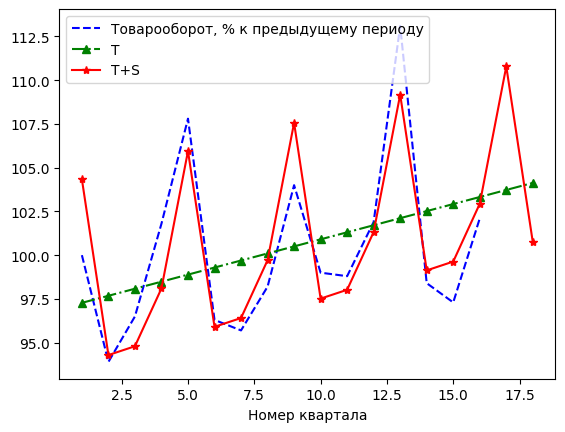

In [78]:
print(f'Таким образом, имеет линейный тренд: '
      f'T = {least_sq_coefs[1]:.2f} + {least_sq_coefs[0]:.3f} * t')
df3[[df3.columns[0],'T','T+S']].iloc[:-2].plot(style=['b--','g^-.','r*-'])

### 5. Предскажем уровни потребления на 17 и 18 кварталы

T для 17 и 18 равна 8,9 и 9,1 соответстенно. S - равна 0,58 и -1,98.  
Тогда предсказанные значения (T + S) равны 9,47 и 7,01. Значения представлены в таблице.

##### Характеристики регрессионной модели были приведены в работе, но не были описаны способы их получения. Поэтому для их вычисления воспользовался пакетом statsmodels

In [79]:
import statsmodels.api as sm
x = sm.add_constant(np.array(list(df3['T+E=Y+S'].iloc[0:16].index.values)))
Y = df3['T+E=Y+S'].iloc[0:16].values
olsmod = sm.OLS(Y, x)
olsres = olsmod.fit()
display(olsres.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     9.691
Date:                Tue, 16 Jan 2024   Prob (F-statistic):            0.00763
Time:                        08:46:17   Log-Likelihood:                -35.562
No. Observations:                  16   AIC:                             75.12
Df Residuals:                      14   BIC:                             76.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8731      1.252     77.357      0.000      94.187      99.559
x1             0.4032      0.130      3.113      0.008       0.125       0.681
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.185
Skew:                          -0.099   Prob(JB):                        0.912
Kurtosis:                       2.512   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""